In [1]:
from sklearn import datasets 
diabetes= datasets.load_diabetes()

In [3]:
import tensorflow as tf 
import keras 
from keras import layers 

2024-10-19 10:52:35.200740: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-19 10:52:35.226576: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-19 10:52:35.233310: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-19 10:52:35.247108: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-19 10:52:36.294769: W tensorflow/compiler/tf2

In [17]:
net={}
net[0]= layers.Input((10,))
net[1]= layers.Dense(16, activation='relu')(net[0])
net[2]= layers.Dense(32, activation='relu')(net[1])
net[3]= layers.Dense(64, activation='relu')(net[2])
net[4]= layers.Dense(32, activation='relu')(net[3])
net[5]= layers.Dense(16, activation='relu')(net[4])
net[6]= layers.Dense(1, activation='relu')(net[5])

In [18]:
model= keras.models.Model(net[0],net[6])

In [19]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 16)             │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,457 (21.32 KB)

 Trainable params: 5,457 (21.32 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
ada= keras.optimizers.Adam(learning_rate=.01)
model.compile(optimizer=ada, loss='mae')

In [21]:
history=model.fit(diabetes['data'], diabetes['target'], 
                 epochs=100, validation_split=.2)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 149.3274 - val_loss: 137.9072
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 105.6242 - val_loss: 68.5426
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 64.5712 - val_loss: 62.7241
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 53.6741 - val_loss: 53.4348
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 48.3894 - val_loss: 51.5672
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 46.1177 - val_loss: 49.7284
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 50.6126 - val_loss: 49.0567
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 47.8063 - val_loss: 54.4269
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 60.4062 - val_loss: 47.1501
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 49.1246 - val_loss: 49.0565
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 43.5656 - val_loss: 45.9286
Epoch 12/100
12/12 ━━━━━━━━━━━━━━━━━━

<Axes: >

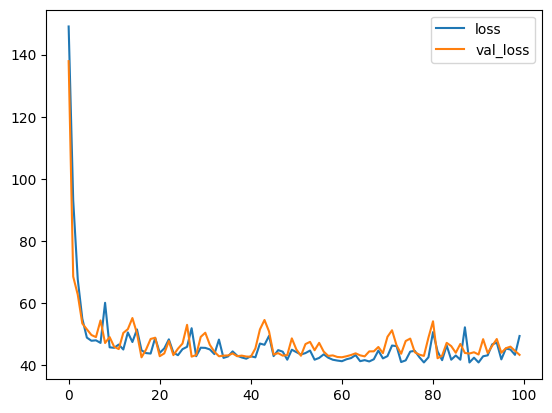

In [22]:
import pandas as pd
pd.DataFrame(history.history).plot()